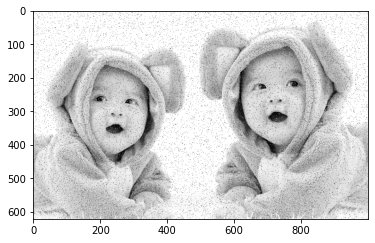

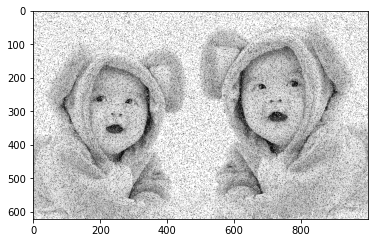

In [ ]:
import cv2
from skimage.util import random_noise
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread("twins.jpg", 0)

sp = random_noise(img, mode='s&p')
sp2 = random_noise(img, mode='s&p', amount = 0.2)

plt.imshow(sp, cmap='gray')
plt.show()

plt.imshow(sp2, cmap='gray')
plt.show()

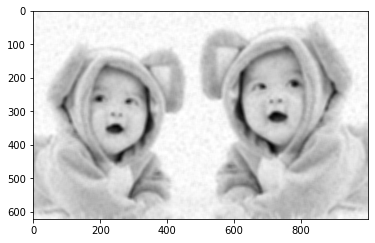

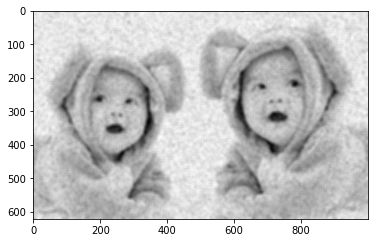

In [ ]:
# filter size
k_size = 11

filter = np.ones((k_size, k_size), np.float32)/(k_size * k_size)

image_sp_a3 = cv2.filter2D(sp, -1, filter)
image_sp2_a3 = cv2.filter2D(sp2, -1, filter)

plt.imshow(image_sp_a3, cmap='gray')
plt.show()

plt.imshow(image_sp2_a3, cmap='gray')
plt.show()

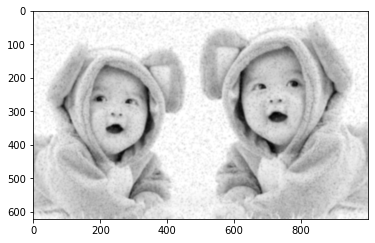

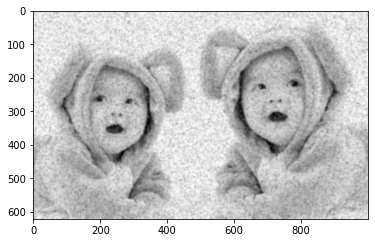

In [ ]:
# filter size
k_size = 11

image_sp_g3 = cv2.GaussianBlur(sp, (k_size, k_size), 0)
image_sp2_g3 = cv2.GaussianBlur(sp2, (k_size, k_size), 0)

plt.imshow(image_sp_g3, cmap='gray')
plt.show()

plt.imshow(image_sp2_g3, cmap='gray')
plt.show()

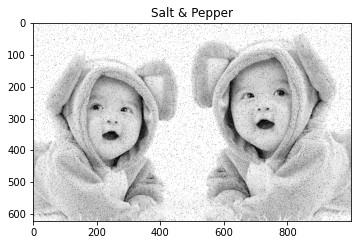

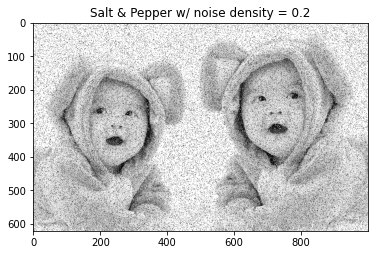

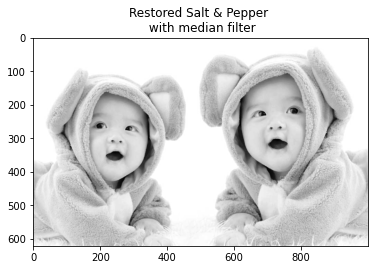

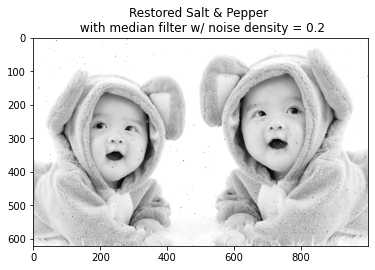

In [ ]:
image_sp = np.array(255 * sp, dtype='uint8')
image_sp2 = np.array(255 * sp2, dtype='uint8')

fig = plt.figure(figsize = (16, 8))
fig.add_subplot(2,2,1)
plt.imshow(image_sp, cmap='gray')
plt.title('Salt & Pepper')
plt.show()

fig.add_subplot(2,2,2)
plt.imshow(image_sp2, cmap='gray')
plt.title('Salt & Pepper w/ noise density = 0.2')
plt.show()

image_md = cv2.medianBlur(image_sp, 3)
image_md2 = cv2.medianBlur(image_sp2, 3)

fig.add_subplot(2,2,3)
plt.imshow(image_md, cmap='gray')
plt.title('Restored Salt & Pepper \n with median filter')
plt.show()

fig.add_subplot(2,2,4)
plt.imshow(image_md2, cmap='gray')
plt.title('Restored Salt & Pepper \n with median filter w/ noise density = 0.2')
plt.show()

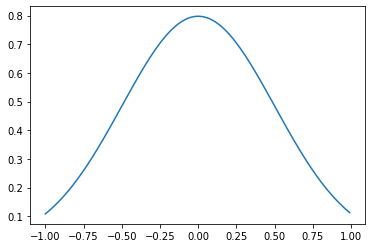

In [ ]:
import numpy as np

mu = 0
std = 0.5

z = np.arange(-1, 1, 0.01)
p = 1/(np.sqrt(2*np.pi)*std)*np.exp(-(z-mu)**2/(2*std*std))
plt.plot(z, p)
plt.show()

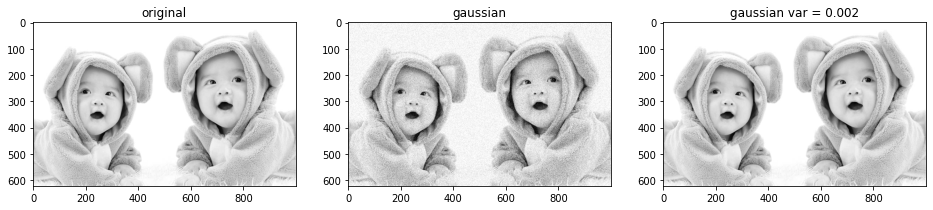

In [ ]:
gauss = random_noise(img, mode='gaussian')
gauss2 = random_noise(img, mode='gaussian', var = 0.002, mean=0.5)

fig = plt.figure(figsize = (16,8))
fig.add_subplot(1,3,1)
plt.imshow(img, cmap='gray')
plt.title('original')

fig.add_subplot(1,3,2)
plt.imshow(gauss, cmap='gray')
plt.title('gaussian')

fig.add_subplot(1,3,3)
plt.imshow(img, cmap='gray')
plt.title('gaussian var = 0.002')
plt.show()

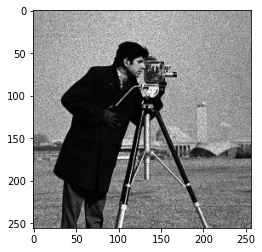

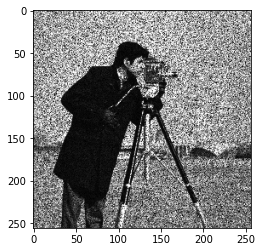

In [ ]:
speckle = random_noise(img, mode='speckle')
speckle2 = random_noise(img, mode='speckle', var = 0.2)

plt.imshow(speckle, cmap='gray')
plt.show()

plt.imshow(speckle2, cmap='gray')
plt.show()

(250, 333)


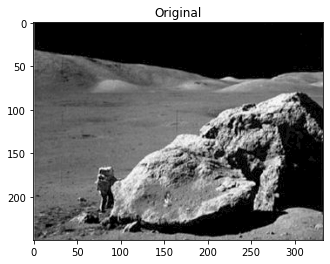

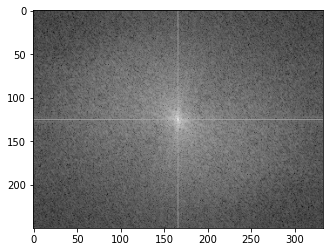

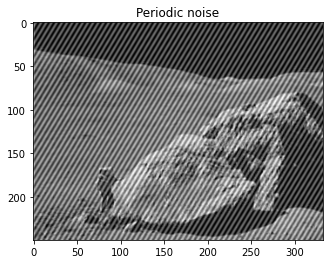

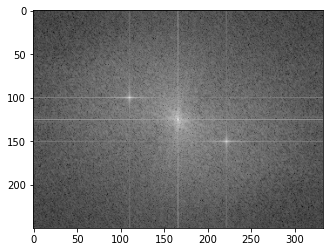

In [ ]:
# strength
s = 100

img2 = cv2.imread("nasa.jpg", 0)

nx, ny = img2.shape
y = np.linspace(-nx/2, nx/2, nx)
x = np.linspace(-ny/2, ny/2, ny)

xv, yv = np.meshgrid(x, y)
p = s * (np.sin(np.pi*xv/3 + np.pi*yv/5) + 1.0)
print(img2.shape)

img_pn = img2.astype(float)+p

plt.title("Original")
plt.imshow(img2, cmap='gray')
plt.show()

f = np.fft.fft2(img2)
fshift = np.fft.fftshift(f)
magnitude_spectrum = np.log(1+np.abs(fshift))

plt.imshow(magnitude_spectrum, cmap='gray')
plt.show()

plt.title("Periodic noise")
plt.imshow(img_pn, cmap='gray')
plt.show()

f = np.fft.fft2(img_pn)
fshift = np.fft.fftshift(f)
magnitude_spectrum = np.log(1+np.abs(fshift))

plt.imshow(magnitude_spectrum, cmap='gray')
plt.show()


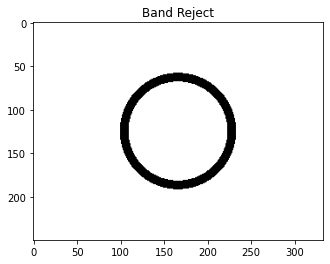

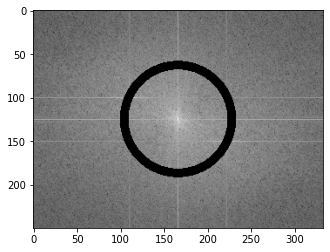

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: ComplexWarning: Casting complex values to real discards the imaginary part


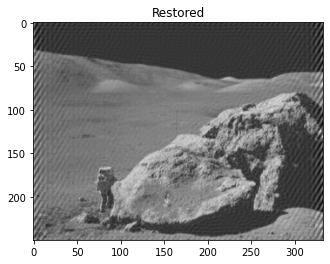

In [ ]:
radiusCoor = np.sqrt(xv*xv + yv*yv)

r1 = radiusCoor < 57
r2 = radiusCoor >= 67

mask1 = np.ones([nx, ny])
bandReject = cv2.bitwise_or(r1.astype(np.uint8), r2.astype(np.uint8), mask=mask1.astype(np.uint8))
plt.imshow(bandReject, cmap='gray')
plt.title("Band Reject")
plt.show()

img_bandReject = bandReject * fshift
img_ft_filter_hp_spectrum = np.log(1 + np.abs(img_bandReject))
plt.imshow(img_ft_filter_hp_spectrum, cmap='gray')
plt.show()

f_ishift_br = np.fft.ifftshift(img_bandReject)
restored_br = np.fft.ifft2(f_ishift_br)
restored_br - np.abs(restored)
plt.imshow(restored_br.astype(np.float32), cmap='gray')
plt.title("Restored")
plt.show()

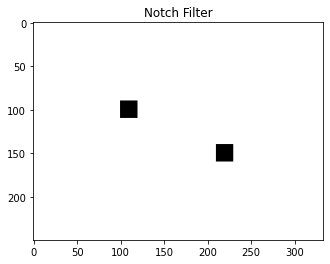

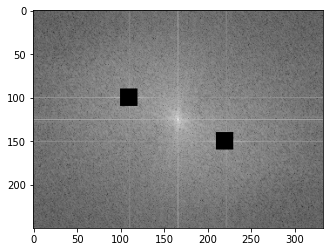

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: ComplexWarning: Casting complex values to real discards the imaginary part


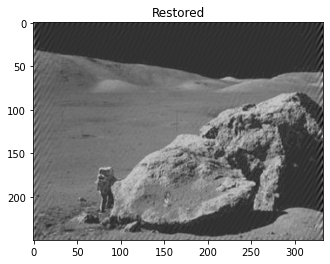

In [ ]:
notchFilter = np.ones([nx, ny])
notchFilter[90:110, 100:120] = 0
notchFilter[140:160, 210:230] = 0

plt.imshow(notchFilter.astype(np.float32), cmap='gray')
plt.title("Notch Filter")
plt.show()

img_notchFilter = notchFilter * fshift
img_ft_filter_hp_spectrum = np.log(1 + np.abs(img_notchFilter))
plt.imshow(img_ft_filter_hp_spectrum, cmap='gray')
plt.show()

f_ishift_br = np.fft.ifftshift(img_notchFilter)
restored_n = np.fft.ifft2(f_ishift_br)
restored_n - np.abs(restored)
plt.imshow(restored_n.astype(np.float32), cmap='gray')
plt.title("Restored")
plt.show()

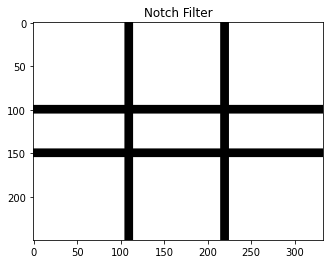

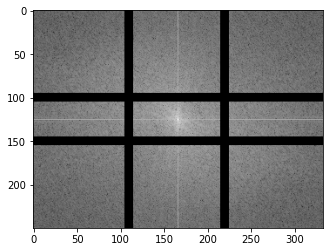

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part


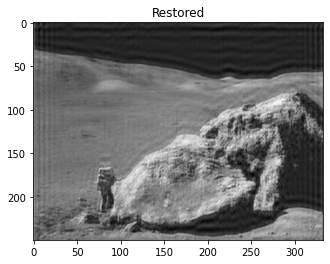

In [ ]:
notchFilter = np.ones([nx, ny])
notchFilter[:, 105:115] = 0
notchFilter[95:105, :] = 0
notchFilter[:, 215:225] = 0
notchFilter[145:155, :] = 0

plt.imshow(notchFilter.astype(np.float32), cmap='gray')
plt.title("Notch Filter")
plt.show()

img_notchFilter = notchFilter * fshift
img_ft_filter_hp_spectrum = np.log(1 + np.abs(img_notchFilter))
plt.imshow(img_ft_filter_hp_spectrum, cmap='gray')
plt.show()

f_ishift_br = np.fft.ifftshift(img_notchFilter)
restored_hashtag = np.fft.ifft2(f_ishift_br)
restored_hashtag - np.abs(restored)
plt.imshow(restored_hashtag.astype(np.float32), cmap='gray')
plt.title("Restored")
plt.show()

In [ ]:
from math import log10, sqrt
def PSNR(original, compressed):
  mse = np.mean((original - compressed) ** 2)
  if mse == 0:
    # MSE is zero means no noise is present in the signal
    # Therefore PSNR have no importance
    return 100
  max_pixel = 255.0
  psnr = 20 * log10(max_pixel / sqrt(mse))
  return psnr

print(f"PSNR of Average = \t\t{PSNR(img, image_sp_a3)}")
print(f"PSNR of Gaussian = \t\t{PSNR(img, image_sp_g3)}")
print(f"PSNR of Median = {PSNR(img, image_md)}")
print(f"PSNR of Median (More noise) = {PSNR(img, image_md2)}")

print(f"PSNR of Band Reject = {PSNR(img2, restored_br)}")
print(f"PSNR of Notch = {PSNR(img2, restored_n)}")
print(f"PSNR of Notch hashtag = {PSNR(img2, restored_hashtag)}")

PSNR of Average = 		1.45915986971026
PSNR of Gaussian = 		1.4592105864707072
PSNR of Median = 35.72569877710172
PSNR of Median (More noise) = 35.0353217388609
PSNR of Band Reject = 8.048484293718426
PSNR of Notch = 8.093063204110624
PSNR of Notch hashtag = 8.058023697871775


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  if __name__ == '__main__':
